# Ejemplo de clasificación de textos usando la librería NLTK

### Este ejemplo hace uso de la librería NLTK para clasificar un texto, extraído de una página web en tiempo real. Esta técnica puede emplearse, por ejemplo, para analizar sobre qué trata un texto determinado (cuáles son los términos clave predominantes en el mismo)

#### 1. Importación de librerías

In [8]:
import nltk # Natural Language ToolKit, la protagonista de este notebook

# Esta sentencia puede emplearse para instalar los módulos de NLTK que se precisen 
# si es que alguno no está instalado, tras ello, puede dejarse comentada
# nltk.download()  

from bs4 import BeautifulSoup # Librería para hacer scraping, en este caso nos va a servir para obtener un texto de un sitio web
 
import urllib.request # Librería para comunicación http

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # modulo de nltk que permite eliminar palabras supérfluas para el análisis de un texto
from nltk.corpus import wordnet as wdn # wordnet es un diccionario que va a permitirnos buscar sinónimos en diferentes idiomas

# Lematizador alternativo para texto en español
# Instalar spacy: 
#                                   pip install spacy  
# y descargar el módulo de español: 
#                                   python -m spacy download es
import spacy

import matplotlib
import seaborn as sns

from googletrans import Translator  # https://pypi.org/project/googletrans

#### 2. Obtener y Tokenizar Texto. Tokenizar  es separar el texto en tokens -en este caso palabras, aunque podrían ser, por ejemplo frases-.

In [20]:
# Obtener el texto
 
response = urllib.request.urlopen('https://www.iefweb.org/es/') # Obtiene el contenido HTML de la página web indicada
 
html = response.read() #Leemos el contenido

#print (html,"\n")

# BeautifulSouop tiene diferentes parsers HTML, y dependiendo de cada caso puede ser más adecuado uno u otro.
#soup = BeautifulSoup(html,"html5lib") # Limpia el texto HTML capturado
soup = BeautifulSoup(html,"html.parser") # Limpia el texto HTML capturado

#print (soup)

# Obtenemos únicamente el texto, sin HTML, pero separando las diferentes frases o párrafos con un espacio en blanco 
# para que no se junten palabras. Las que se juntan son "leyenda" de iconos e imágenes
text = soup.get_text(strip=False) 
 
print (text)














Instituto Estudios Financieros - Líder en conocimiento financiero































































































 



























 
 
 
 Campus
 Área privada
CAT
ESP
ENG














Sobre IEF 
Sobre el InstitutoNoticiasAgendaAlumniBolsa de trabajoProfesorado 





Sobre el Instituto  Noticias  Agenda   



Alumni  Bolsa de trabajo  Profesorado   




Formación corporativa 
Formación corporativaFormación con certificación profesionalDesarrollo Profesional 





Formación corporativa  Formación con certificación profesional  Desarrollo Profesional   




Formación abierta 
Toda la oferta formativaMáster en FinanzasPostgradosPostgrado de Analista Internacional de Mercados FinancierosPostgrado de Innovación Tecnológica en FinanzasPrograma Especialista Universitario de Auditoría Interna BancariaVer todosCertificacionesCurso de certificación EFPA EIP y EFA intensivoPrograma EIP onlineCurso de preparación al Level 1 de

#### 3. Procesamiento del texto para su posterior análisis

In [21]:
# Crear tokens por palabras

# indicamos a nltk que use el tokenizador en idioma español y partimos en palabras nuestro texto
tokens = word_tokenize(text,"spanish") 

tokens=[word.lower() for word in tokens if word.isalpha()] # Eliminar los signos de puntuación y convertir a minúsculas
print(tokens)

['instituto', 'estudios', 'financieros', 'líder', 'en', 'conocimiento', 'financiero', 'campus', 'área', 'privada', 'cat', 'esp', 'eng', 'sobre', 'ief', 'sobre', 'el', 'institutonoticiasagendaalumnibolsa', 'de', 'trabajoprofesorado', 'sobre', 'el', 'instituto', 'noticias', 'agenda', 'alumni', 'bolsa', 'de', 'trabajo', 'profesorado', 'formación', 'corporativa', 'formación', 'corporativaformación', 'con', 'certificación', 'profesionaldesarrollo', 'profesional', 'formación', 'corporativa', 'formación', 'con', 'certificación', 'profesional', 'desarrollo', 'profesional', 'formación', 'abierta', 'toda', 'la', 'oferta', 'formativamáster', 'en', 'finanzaspostgradospostgrado', 'de', 'analista', 'internacional', 'de', 'mercados', 'financierospostgrado', 'de', 'innovación', 'tecnológica', 'en', 'finanzasprograma', 'especialista', 'universitario', 'de', 'auditoría', 'interna', 'bancariaver', 'todoscertificacionescurso', 'de', 'certificación', 'efpa', 'eip', 'y', 'efa', 'intensivoprograma', 'eip', '

In [22]:
# Verificar frecuencia de palabras 
# Vamos a ver qué tokens son los que más aparecen y si podemos profundizar en la limpieza del texto

freq = nltk.FreqDist(tokens)
for key,val in freq.items():
    print (str(key) + ':' + str(val))

instituto:4
estudios:3
financieros:84
líder:2
en:118
conocimiento:9
financiero:22
campus:3
área:1
privada:2
cat:2
esp:3
eng:2
sobre:11
ief:17
el:84
institutonoticiasagendaalumnibolsa:1
de:277
trabajoprofesorado:1
noticias:2
agenda:2
alumni:1
bolsa:1
trabajo:3
profesorado:1
formación:18
corporativa:3
corporativaformación:1
con:40
certificación:22
profesionaldesarrollo:1
profesional:17
desarrollo:5
abierta:4
toda:2
la:130
oferta:3
formativamáster:1
finanzaspostgradospostgrado:1
analista:4
internacional:6
mercados:13
financierospostgrado:1
innovación:11
tecnológica:4
finanzasprograma:1
especialista:4
universitario:4
auditoría:5
interna:6
bancariaver:1
todoscertificacionescurso:1
efpa:10
eip:10
y:148
efa:9
intensivoprograma:1
onlinecurso:1
preparación:3
al:10
level:2
designación:2
cfaver:1
todoscursos:1
especializaciónfinanzas:1
sostenibles:7
para:68
asesoramiento:7
financierofintech:1
servicios:5
financierosver:1
todosmoocs:1
workshopsiniciación:1
a:63
las:50
finanzas:33
personalesjunior:

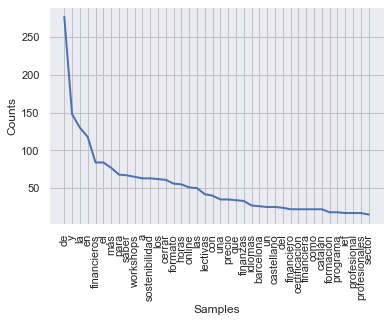

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [59]:
# Visualizar Tokens
sns.set()
freq.plot(40, cumulative=False)

##### Puede verse que hay algunos tokens que no son significativos para clasificar o analizar el texto, como por ejemplo: a, y, la, en, el, ...

##### A estas palabras se las denomina "stop words" y deben eliminarse, ya que aparecen mucho en los textos y no aportan ninguna información para la clasificación de los mismos

# 2. Eliminar Palabras de Parada o Stop_words

In [29]:

# en clean_tokens vamos a guardar la lista de tokens sin las stop words
clean_tokens = tokens
 
for token in tokens:
 
    if token in stopwords.words('spanish'): # de nuevo hay que indicar que estamos trabajando en español
 
        clean_tokens.remove(token)
    
#print (clean_tokens)

In [30]:
#Verificar frecuencia de palabras 
freq_clean = nltk.FreqDist(clean_tokens)
for key,val in freq_clean.items():
    print (str(key) + ':' + str(val))

instituto:4
estudios:3
financieros:84
líder:2
conocimiento:9
financiero:22
campus:3
área:1
privada:2
cat:2
esp:3
eng:2
ief:17
institutonoticiasagendaalumnibolsa:1
trabajoprofesorado:1
noticias:2
agenda:2
alumni:1
bolsa:1
trabajo:3
profesorado:1
formación:18
corporativa:3
corporativaformación:1
certificación:22
profesionaldesarrollo:1
profesional:17
desarrollo:5
abierta:4
toda:2
oferta:3
formativamáster:1
finanzaspostgradospostgrado:1
analista:4
internacional:6
mercados:13
financierospostgrado:1
innovación:11
tecnológica:4
finanzasprograma:1
especialista:4
universitario:4
auditoría:5
interna:6
bancariaver:1
todoscertificacionescurso:1
efpa:10
eip:10
efa:9
intensivoprograma:1
onlinecurso:1
preparación:3
level:2
designación:2
cfaver:1
todoscursos:1
especializaciónfinanzas:1
sostenibles:7
asesoramiento:7
financierofintech:1
servicios:5
financierosver:1
todosmoocs:1
workshopsiniciación:1
finanzas:33
personalesjunior:1
summer:2
schoolworkshops:1
financieroscápsulas:1
online:51
continuabecas:

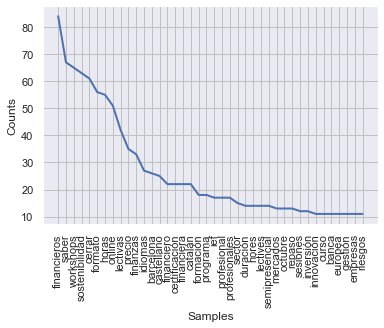

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
#Visualizar Tokens
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
freq_clean.plot(40, cumulative=False)

##### Ahora ya tiene mejor pinta, pero podemos encontrarnos diferentes palabras de interés y cuya frecuencia no es fiable por el uso de sinónimos, por lo que vamos a sustituir los sinónimos de las palabras más relevantes. Incluso, encontramos algunas palabras en catalán, pero sobre ellas no vamos a hacer nada, ya que su volumen es muy poco significativo.

# 3. Obtener Tokens  Sinónimos y Reemplazarlos

In [44]:
# se buscan los sinónimos en ingles de una palabra española y luego en cada synset (conjunto de sinónimos) se busca, 
# para cada sinonimo el lema en español


print('Ejemplo simple:')
print('-------------------------------------------')

conjuntos_de_sinonimos = wdn.synsets('coche', lang='spa') # Hay un conjunto por cada significado o contexto posible...

print('Conjuntos de sinónimos disponibles: ',len(conjuntos_de_sinonimos))

for conjunto in conjuntos_de_sinonimos:   # para cada uno de los conjuntos
        sins = []
        for l in conjunto.lemmas(lang='spa'): # existen diferentes lemas en español, el nombre de cada lema es un sinónimo
            sins.append(l.name())
        print (sins)
print('-------------------------------------------\n')


Ejemplo simple:
-------------------------------------------
Conjuntos de sinónimos disponibles:  3
['auto', 'automóvil', 'carro', 'coche', 'máquina', 'turismo', 'vehículo']
['automotor', 'coche', 'vagón']
['coche', 'vagón', 'vagón_de_pasajeros']
-------------------------------------------



In [51]:
# Seleccionamos, entre los 40 tokens que más aparecen, aquellos que consideramos más significativos y buscamos sus 
# sinónimos para sustituirlos por éstos literales. A constinuación vemos cómo cambia la gráfica

# en clean_tokens_sin vamos a guardar la lista de tokens pero con los sinónimos sustituidos.
clean_tokens_sin = clean_tokens

terminos = ['inversión', 'ingreso', 'ingresos', 'gasto', 'gastos', 'beneficios', 'beneficio', 'dinero', 'valor', 'finanzas', 'libertad', 'financiera', 'libertad financiera', 'formación', 'formacion', 'riesgo', 'riesgos','mercado', 'mercados', 'bolsa', 'curso', 'máster', 'master', 'gestión', 'saber', 'empresa', 'empresas']

for palabra in terminos: # para cada término -o palabra-
    
    #print('Término a unificar: ',palabra,'\n')
    conjuntos_de_sinomimos = wdn.synsets(palabra, lang="spa") #obtenemos sus conjuntos de sinónimos
    
    sinonimos=[]
    for conjunto in conjuntos_de_sinomimos: # para cada conjunto nos quedamos con cada sinónimo
        for l in conjunto.lemmas(lang='spa'):
            # a veces el sinónimo es una expresión y como wordnet pone '_' en vez de espacios, lo sustituimos
            sinonimos.append(l.name().replace('_',' ')) 
  
    sinonimos = list(set(sinonimos)) #al convertir en conjunto eliminamos las repeticiones, luego pasamos a lista de nuevo
    #print ('Sinónimos a sustituir en el texto: ',sinonimos,'\n\n')
     
    # para cada uno de los sinónimos de cada palabra, sustituimos el sinónimo por nuestra palabra
    for ind,sin in enumerate(sinonimos):
        clean_tokens_sin = [word.replace(sinonimos[ind],palabra) for word in clean_tokens_sin]
                    


In [52]:
#Recalcular frecuencia de palabras con sinónimos agregados
freq_clean_sin = nltk.FreqDist(clean_tokens_sin)
for key,val in freq_clean_sin.items():
    print (str(key) + ':' + str(val))

instituto:4
estudios:3
financieros:84
líder:2
saber:79
financiero:22
campus:3
área:1
privada:2
cat:2
esp:3
eng:2
ief:17
institutonoticiasagendaalumnibolsa:1
trabajoprofesorado:1
noticias:2
agenda:2
alumni:1
bolsa:1
trabajo:3
profesorado:1
formación:33
corporativa:3
corporativaformación:1
certificación:22
profesionaldesarrollo:1
profesional:17
desarrollo:5
abierta:4
toda:2
oferta:3
formativamáster:1
finanzaspostgradospostgrado:1
analista:4
internacional:6
mercados:13
financierospostgrado:1
innovación:11
tecnológica:4
finanzasprograma:1
especialista:4
universitario:4
auditoría:5
interna:6
bancariaver:1
todoscertificacionescurso:1
efpa:10
eip:10
efa:9
intensivoprograma:1
onlinecurso:1
level:2
designación:2
cfaver:1
todoscursos:1
especializaciónfinanzas:1
sostenibles:7
asesoramiento:7
financierofintech:1
servicios:5
financierosver:1
todosmoocs:1
workshopsiniciación:1
finanzas:33
personalesjunior:1
summer:2
schoolworkshops:1
financieroscápsulas:1
online:51
continuabecas:1
financiaciónmatriz

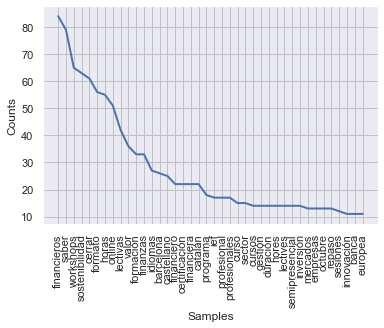

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
#Visualizar Tokens
freq_clean_sin.plot(40, cumulative=False)

# 4. Obtener Antónimos

### Los antónimos pueden emplearse en un análisis más profundo, pero wordnet, en la fecha de elaboración de este notebook no los soporta en españo, por lo que habría que recurrir a alguna otra librería o mediante scraping sobre un sitio de sitnónimos y antónimos

In [11]:
# con los antónimos el procedimiento es similar. En este caso no vamos a tenerlos en cuenta pero se haría del siguiente modo
# si se prueba a especificar idioma inglés (que es el por defecto) vemos que si se obtienen

terminos = ['riqueza', 'bueno', 'bonito']

for palabra in terminos:
    synonyms = []
    antonyms = []
    print('Palabra: ', palabra)
    syn_set = wdn.synsets(palabra, lang='spa')
    for syn in syn_set:
        for l in syn.lemmas(lang='spa'):
            
            if l.antonyms():
                antonyms.append(l.antonyms()[0].name())
            else:
                synonyms.append(l.name())

    print('Sinonimos: ',set(synonyms))
    print('Antónimos: ',set(antonyms),'\n\n')


Palabra:  riqueza
Sinonimos:  {'plenitud', 'abundancia', 'patrimonio', 'riqueza', 'lujo', 'opulencia', 'madurez', 'caudal', 'hacienda', 'fortuna', 'afluencia'}
Antónimos:  set() 


Palabra:  bueno
Sinonimos:  {'bien', 'sólido', 'ideal', 'serio', 'alegre', 'abundante', 'contento', 'idóneo', 'nutritivo', 'feliz', 'sano', 'correcto', 'bueno', 'buen'}
Antónimos:  set() 


Palabra:  bonito
Sinonimos:  {'estupendo', 'encantador', 'bonítalo', 'cautivador', 'agradable', 'hermoso', 'espléndido', 'bonito', 'simpático', 'precioso', 'bello'}
Antónimos:  set() 




In [20]:
# Como puede observarse, no disponemos de antónimos en español, por lo que vamos a mostrar cómo conseguirlos.

# Para ello empleamos una librería de Python que nos permite usar googleTrans.
# pip install googletrans

# Googletrans is a free and unlimited python library that implemented Google Translate API. 
# This uses the Google Translate Ajax API to make calls to such methods as detect and translate.
# Compatible with Python 3.6+.
# https://pypi.org/project/googletrans

translator = Translator()

terminos = ['riqueza', 'bueno', 'bonito']

for palabra in terminos:
    synonyms = []
    antonyms = []
    eng_antonyms = []
    print('Palabra: ', palabra)
    syn_set = wdn.synsets(palabra, lang='spa')
    for syn in syn_set:
        for l in syn.lemmas():
            if l.antonyms():
                antonyms.append(translator.translate(l.antonyms()[0].name(), dest='spanish').text)
                eng_antonyms.append(l.antonyms()[0].name())
            else:
                synonyms.append(translator.translate(l.name(),dest='spanish').text)
                
    print('Sinonimos: ',set(synonyms))
    print('Antónimos: ',set(eng_antonyms))
    print('Antónimos: ',set(antonyms),'\n\n')

Palabra:  riqueza
Sinonimos:  {'profuseness', 'prolificidad', 'plenitud', 'inmuebles', 'riqueza', 'Rico', 'Fertilidad', 'profusión', 'cuerno de la abundancia', 'exuberancia', 'suavidad', 'wealthiness', 'afluencia'}
Antónimos:  {'poverty'}
Antónimos:  {'pobreza'} 


Palabra:  bueno
Sinonimos:  {'bien', 'maduro', 'sólido', 'virgen', 'cuadrado', 'abundante', 'honesto', 'sin descomponer', 'saludable', 'sustancial', 'derecho', 'beneficioso', 'sonido', 'grave', 'correcto', 'bueno', 'satisfactorio'}
Antónimos:  {'badness', 'sad', 'bad', 'foul', 'evil'}
Antónimos:  {'mal', 'maldad', 'Estados Unidos', 'falta', 'malo'} 


Palabra:  bonito
Sinonimos:  {'susto', 'valiente', 'bonita', 'bonito', 'Atlantic_bonito', 'barrilete', 'gay', 'Sarda_sarda'}
Antónimos:  {'ugly', 'nasty'}
Antónimos:  {'asqueroso', 'feo'} 




# 5. Lematizar palabras

### La lematización obtiene la raiz de cada palabra dentro de su contexto. Esto va a permitir "juntar" tokens diferentes por su raiz, obteniendo un conjunto más pequeño de tokens y con mayor concentración de las palabreas clave que definen el tipo de texto

In [62]:
#nlp = spacy.blank('es')
spa_nlp = spacy.load('es_core_news_sm') # se carga el modelo español

In [63]:
# Ejemplo de lematización. en caca linea va a mostrar la palabra, su lema y el tipo de palabra que es
palabras='comer comida comería comido comen'
clean_tokens_sin_lem=[]
for token in spa_nlp(palabras): # Se juntan los tokens en una string, string es el formato necesario para spacy
    print(token.text, token.lemma_, token.pos_)
    clean_tokens_sin_lem.append(token.lemma_)
    
print (clean_tokens_sin_lem)
clean_tokens_sin_lem=[]

comer comer VERB
comida comer NOUN
comería comer VERB
comido comer ADJ
comen comer PROPN
['comer', 'comer', 'comer', 'comer', 'comer']


In [65]:
#Lematizar tokens tras limpieza y una vez convertidos los sinónimos
clean_tokens_sin_lem = []
separator = ' '
for token in spa_nlp(separator.join(clean_tokens_sin)): #Se juntan los tokens en una string, string es el formato que necesita spacy
    print(token.text, token.lemma_, token.pos_)
    clean_tokens_sin_lem.append(token.lemma_)

instituto instituto PROPN
estudios estudio PROPN
financieros financiero ADJ
líder líder NOUN
saber saber VERB
financiero financiero ADJ
campus campus NOUN
área área NOUN
privada privar ADJ
cat cat ADP
esp esp PROPN
eng eng PROPN
ief ief PROPN
institutonoticiasagendaalumnibolsa institutonoticiasagendaalumnibolsa ADJ
trabajoprofesorado trabajoprofesorado ADJ
instituto instituto PROPN
noticias noticiar PROPN
agenda agenda PROPN
alumni alumni PROPN
bolsa bolsa PROPN
trabajo trabajar NOUN
profesorado profesorado ADJ
formación formación NOUN
corporativa corporativo ADJ
formación formación NOUN
corporativaformación corporativaformación PROPN
certificación certificación NOUN
profesionaldesarrollo profesionaldesarrollo NOUN
profesional profesional ADJ
formación formación NOUN
corporativa corporativo ADJ
formación formación NOUN
certificación certificación NOUN
profesional profesional ADJ
desarrollo desarrollar NOUN
profesional profesional ADJ
formación formación NOUN
abierta abrir ADJ
toda todo

especialmente especialmente ADV
diseñadas diseñar ADJ
cada cada DET
necesidad necesidad NOUN
cliente cliente ADJ
formación formación NOUN
certificación certificación NOUN
profesional profesional ADJ
referentes referente ADJ
formación formación NOUN
profesionales profesional ADJ
entidades entidad NOUN
empresas empresa NOUN
principales principal ADJ
acreditaciones acreditación NOUN
certificaciones certificación NOUN
profesionales profesional ADJ
mundo mundo NOUN
financiero financiero ADJ
oferta ofertar NOUN
formativa formativo ADJ
incluye incluir VERB
amplia amplio ADJ
gama gama PROPN
formación formación NOUN
específica específico ADJ
obtención obtención PROPN
certificaciones certificación NOUN
suponen suponer AUX
cumplimiento cumplimiento NOUN
requerimientos requerimiento NOUN
legales legal ADJ
elevar elevar VERB
resaber resaber VERB
prestigio prestigiar NOUN
profesional profesional ADJ
saber saber VERB
desarrollo desarrollar NOUN
personal personal ADJ
capacitamos capacitar VERB
potenci

workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
cerrar cerrar VERB
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
cerrar cerrar VERB
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
cerrar cerrar VERB
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
cerrar cerrar VERB
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
cerrar cerrar VERB
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
cerrar cerrar VERB
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
cerrar cerrar VERB
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
productos producto NOUN
financieros financiero ADJ
derivados derivar ADJ
programa programar NOUN
orientado orientar ADJ
formar formar VERB
operadores opera

workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
cerrar cerrar VERB
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
cerrar cerrar VERB
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
clasificación clasificación NOUN
activos activo ADJ
financieros financiero ADJ
instrumentos instrumento NOUN
financieros financiero ADJ
disponen disponer AUX
normativa normativo NOUN
específica específico ADJ
extensa extenso ADJ
ahora ahora ADV
reunida reunir ADJ
norma norma NOUN
internacional internacional ADJ
información información NOUN
inversiones inversión NOUN
activos activo ADJ
fijos fijo ADJ
activos activo ADJ
circulantes circulante ADJ
todas todo DET
diversas diverso DET
empresas empresa NOUN
invierten invertir AUX
activos activo NOUN
fijos fijo ADJ
circulantes circulante NOUN
todas todo DET
empresas empresa NOUN
idiomas idioma ADJ
castellano castellano NOUN
catalán catalán ADJ

financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
behavioural behavioural ADJ
finance finance PROPN
denominación denominación NOUN
behavioral behavioral ADJ
finance finance NOUN
hacemos hacer VERB
referencia referenciar NOUN
curso cursar ADJ
pensamiento pensamiento NOUN
análisis análisis NOUN
económico económico ADJ
aporta aportar VERB
renovado renovar ADJ
enfoque enfocar NOUN
respecto respectar INTJ
cómo cómo PRON
personas personar NOUN
tomamos tomar VERB
decisiones decisión NOUN
financieras financiero ADJ
decir decir VERB
decisiones decisión NOUN
relacionadas relacionar ADJ
gastos gasto NOUN
ahorros ahorro ADJ
inversiones inversión NOUN
idiomas idioma ADJ
castellano castellano NOUN
catalán catalán ADJ
horas hora NOUN
lectivas lectivo ADJ
formato formato NOUN
online online PROPN
valor valor NOUN
saber saber VERB
inteligencia inteligencia NOUN
emocional emocional ADJ
curso cursar NOUN
excelencia excelencia NOUN
cápsula cápsula ADJ
estudiaremos estudiar VERB
impacto impacta

horas hora NOUN
lectivas lectivo ADJ
formato formato NOUN
online online PROPN
valor valor NOUN
saber saber VERB
cerrar cerrar PROPN
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
cerrar cerrar VERB
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
cerrar cerrar VERB
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
cerrar cerrar VERB
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
cerrar cerrar VERB
workshops workshops PROPN
financieros financiero ADJ
sostenibilidad sostenibilidad PROPN
workshop workshop PROPN
asesoramiento asesoramiento NOUN
créditos crédito NOUN
hipotecarios hipotecario ADJ
tratarán tratar VERB
siguientes siguiente ADJ
temas temer NOUN
principales principal ADJ
cambios cambio NOUN
ha haber AUX
traído traer VERB
nueva nuevo ADJ
ley ley NOUN
hipotecaria hipotecario PROPN
min minuto PROPN
asesorar asesorar VERB


linkedin linkedin PROPN
facebook facebook INTJ
twitter twitter PROPN
youtube youtube NOUN
legal legal ADJ
política político ADJ
privacidad privacidad NOUN
política político ADJ
cookies cookies PROPN
política político ADJ
compra comprar PROPN
sitio sitiar PROPN
web web PROPN
utiliza utilizar PROPN
cookies cookies PROPN
mejorar mejorar VERB
experiencia experiencia NOUN
asumiremos asumir VERB
está estar AUX
acuerdo acordar INTJ
puede poder AUX
optar optar VERB
no no ADV
participar participar VERB
si si SCONJ
desea desear VERB
accepta accepta VERB
informaciónprivacy informaciónprivacy NOUN
cookies cookies PROPN
policy policy PROPN
necesarias necesario ADJ
siempre siempre ADV
activado activar ADJ


In [68]:
# Recalcular frecuencia de palabras con sinónimos agregados
freq_clean_sin_lem = nltk.FreqDist(clean_tokens_sin_lem)
for key,val in freq_clean_sin_lem.items():
    print (str(key) + ':' + str(val))


instituto:4
estudio:3
financiero:138
líder:3
saber:79
campus:3
área:2
privar:2
cat:2
esp:3
eng:2
ief:17
institutonoticiasagendaalumnibolsa:1
trabajoprofesorado:1
noticiar:2
agenda:2
alumni:1
bolsa:1
trabajar:4
profesorado:1
formación:33
corporativo:5
corporativaformación:1
certificación:31
profesionaldesarrollo:1
profesional:34
desarrollar:13
abrir:5
todo:7
ofertar:3
formativamáster:1
finanzaspostgradospostgrado:1
analista:4
internacional:7
mercar:14
financierospostgrado:1
innovación:12
tecnológico:5
finanzasprograma:1
especialista:4
universitario:5
auditoría:5
interno:6
bancariaver:1
todoscertificacionescurso:1
efpa:10
eip:10
efa:9
intensivoprograma:1
onlinecurso:1
level:2
designación:2
cfaver:1
todoscursos:1
especializaciónfinanzas:1
sostenible:9
asesoramiento:7
financierofintech:1
servicio:8
financierosver:1
todosmoocs:1
workshopsiniciación:1
finanzas:33
personalesjunior:1
summer:2
schoolworkshops:1
financieroscápsulas:1
online:51
continuabecas:1
financiaciónmatriz:1
ámbito:5
format

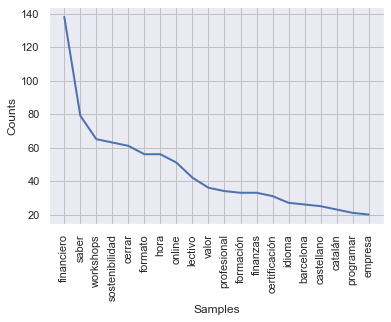

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [70]:
    
#Visualizar Tokens
freq_clean_sin_lem.plot(20, cumulative=False)

#### Ahora puede observarse cómo financiero ha incrementrado de forma significativa su número de apariciones. Viendo los 20 tokens que con más frecuencia aparecen, puede observarse que el sitio web ofrece un contenido financiero (financiero, finanzas) y formativo (workshops, lectivo).